# Classification 

In this tutorial we are going to give a brief overview of classification and apply it to a use case in Cardiovascular MRI.

The tutorial is subdivided into 3 hands-on tutorials:

1. Performing a simple logistic regression model using Tensorflow (no images).
2. Constructing a simple classification model (CNN), which takes as input an image and returns a probability class.
3. Toy example: Preparing a small dataset with 'short axis' data and 'other orientation' data, fitting the classification model, evaluating the model on a test set.

> **Tip**: if you are running this in Google Colab, you can enable GPU computation by clicking on **Runtime > Change runtime type** and selecting **GPU** under **Hardware accelerator**. This will significantly speed up training of neural networks.


## Hands-on: Logistic regression using TensorFlow

We apply the concepts of machine learning to a simple problem: **logistic regression**. 

While in linear regression, we aim to solve: 
$$y = wx + b$$
where $w$ is the slope of the line, called **weight**, and $b$ is the intercept, called **bias**.

In logistic regression, as previously explained we aim to solve a slightly different problem: 
$$y = h(wx + b)$$
where $h$ is the sigmoid function $h(𝐰⋅𝐱+𝑏)=1/(1+exp(−(𝐰⋅𝐱+𝑏)))$

In [41]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

We define a distribution of points which are either from class 1 or 0. 
In this case (Easy Distribution) the class 1 and 0 are nicely separated using a single feature. 
A human would easily separate the two classes intuitively assigning the classes (if Feature>50 green, else red)

### Easy distribution

Text(0.5, 1.0, 'Logistic Regression')

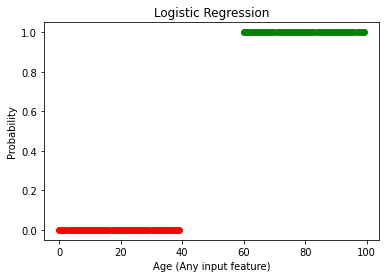

In [101]:
#Easy distribution (Perfect Feature)
x=np.concatenate((np.arange(0,40),np.arange(60,100)))
y=np.zeros(x.shape)
y[x.shape[0]//2:]=1
x2=np.arange(0,100)

plt.figure()
plt.plot(x[y==0],y[y==0],'ro')
plt.plot(x[y>0],y[y>0],'go')
plt.xlabel('Age (Any input feature)')
plt.ylabel('Probability')
plt.title('Logistic Regression')

Now let's create a basic ML model and fit a sigmoid function mapping the input to the probability it belongs to class 1.

In [43]:
tf.random.set_seed(1)
np.random.seed(1)

model = tf.keras.Sequential()
number_of_classes = 1
number_of_features = 1 
model.add(tf.keras.layers.Dense(number_of_classes,activation = 'sigmoid',input_dim = number_of_features))
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
loss= 'binary_crossentropy'

model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
history = model.fit(x, y, epochs=200,batch_size=5)


Epoch 1/200
16/16 [==============================] - 0s 860us/step - loss: 43.3059 - accuracy: 0.4875
Epoch 2/200
16/16 [==============================] - 0s 723us/step - loss: 37.3936 - accuracy: 0.4875
Epoch 3/200
16/16 [==============================] - 0s 769us/step - loss: 31.5363 - accuracy: 0.4875
Epoch 4/200
16/16 [==============================] - 0s 815us/step - loss: 25.5831 - accuracy: 0.4875
Epoch 5/200
16/16 [==============================] - 0s 886us/step - loss: 19.5554 - accuracy: 0.4750
Epoch 6/200
16/16 [==============================] - 0s 836us/step - loss: 14.0708 - accuracy: 0.4750
Epoch 7/200
16/16 [==============================] - 0s 772us/step - loss: 7.9136 - accuracy: 0.4375
Epoch 8/200
16/16 [==============================] - 0s 818us/step - loss: 2.6993 - accuracy: 0.2125
Epoch 9/200
16/16 [==============================] - 0s 853us/step - loss: 0.9740 - accuracy: 0.5000
Epoch 10/200
16/16 [==============================] - 0s 841us/step - loss: 0.9341 - 

Once trained, we need to assess the results. If the model is learning correctly, we should see the loss becoming lower over time. The `history` object returned by `model.fit` holds information about the loss for each epoch. Let's use it to plot the loss over time.

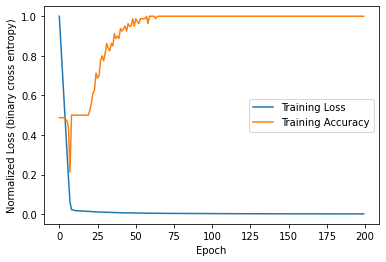

In [44]:
plt.plot(history.history['loss']/np.max(history.history['loss']),label='Training Loss')
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Normalized Loss (binary cross entropy)')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Logistic Regression \n Easy case fit: w=0.151  b=7.048')

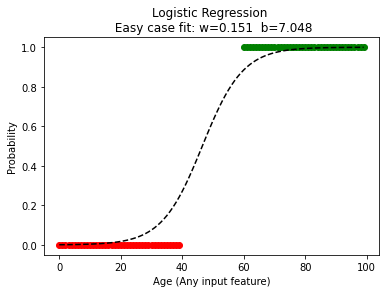

In [45]:
#Prediction
output=[]
x2=np.arange(0,100)

for inputs in x2:
    output.append(model(tf.expand_dims(inputs,axis=0)))

plt.figure()
plt.plot(x[y==0],y[y==0],'ro')
plt.plot(x[y>0],y[y>0],'go')
plt.plot(x2,np.stack(output)[:,0,0],'k--')
plt.xlabel('Age (Any input feature)')
plt.ylabel('Probability')
plt.title('Logistic Regression \n Easy case fit: w=' +str(model.get_weights()[0])[2:-7]+'  b='+str(model.get_weights()[1])[2:-5])


Here there is no ambiguity, and the model is perfectly classifying all points.

### Harder Distribuiton

In the next exemple the feature is less discriminating. Meaning that it cannot fully separate the two classes with certainty.

You want to intuitively set the separation to a similar value although with much more uncertainty towards the middle.

We perform the same fitting procedure to this new distribution

Text(0.5, 1.0, 'Logistic Regression')

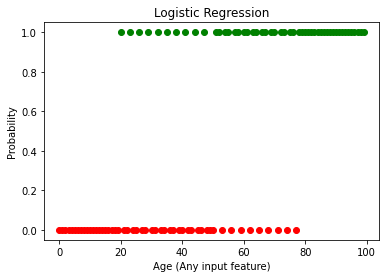

In [46]:
#Harder Distribution (Imperfect Feature)
x2=np.arange(0,100)
y2=np.zeros(x2.shape)
y2[50:]=1
y2[20:80:3]+=1
y2=y2%2

plt.figure()
plt.plot(x2[y2==0],y2[y2==0],'ro')
plt.plot(x2[y2>0],y2[y2>0],'go')
plt.xlabel('Age (Any input feature)')
plt.ylabel('Probability')
plt.title('Logistic Regression')

In [47]:
#Train the same model same initialisation from different distribution
tf.random.set_seed(1)
np.random.seed(1)

model = tf.keras.Sequential()
number_of_classes = 1
number_of_features = 1 
model.add(tf.keras.layers.Dense(number_of_classes,activation = 'sigmoid',input_dim = number_of_features))
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
loss= 'binary_crossentropy'

model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
history2 = model.fit(x2, y2, epochs=200,batch_size=5)


Epoch 1/200
20/20 [==============================] - 0s 923us/step - loss: 36.5403 - accuracy: 0.4900
Epoch 2/200
20/20 [==============================] - 0s 809us/step - loss: 30.3646 - accuracy: 0.4900
Epoch 3/200
20/20 [==============================] - 0s 782us/step - loss: 23.7077 - accuracy: 0.4900
Epoch 4/200
20/20 [==============================] - 0s 808us/step - loss: 17.3986 - accuracy: 0.4900
Epoch 5/200
20/20 [==============================] - 0s 788us/step - loss: 11.3131 - accuracy: 0.4700
Epoch 6/200
20/20 [==============================] - 0s 759us/step - loss: 4.7997 - accuracy: 0.4300
Epoch 7/200
20/20 [==============================] - 0s 802us/step - loss: 1.1284 - accuracy: 0.4200
Epoch 8/200
20/20 [==============================] - 0s 824us/step - loss: 0.8638 - accuracy: 0.5000
Epoch 9/200
20/20 [==============================] - 0s 773us/step - loss: 0.8498 - accuracy: 0.3800
Epoch 10/200
20/20 [==============================] - 0s 764us/step - loss: 0.7904 - a

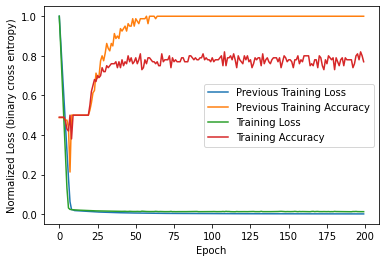

In [48]:
plt.plot(history.history['loss']/np.max(history.history['loss']),label='Previous Training Loss')
plt.plot(history.history['accuracy'],label='Previous Training Accuracy')
plt.plot(history2.history['loss']/np.max(history2.history['loss']),label='Training Loss')
plt.plot(history2.history['accuracy'],label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Normalized Loss (binary cross entropy)')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Logistic Regression \n Harder case fit: w=0.062  b=3.36')

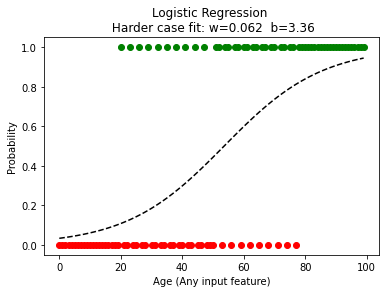

In [49]:
#Logistic regression
output2=[]
for inputs in x2:    
    output2.append(model(tf.expand_dims(inputs,axis=0)))
plt.figure()
plt.plot(x2[y2==0],y2[y2==0],'ro')
plt.plot(x2[y2>0],y2[y2>0],'go')
plt.plot(x2,np.stack(output2)[:,0,0],'k--')
plt.xlabel('Age (Any input feature)')
plt.ylabel('Probability')
plt.title('Logistic Regression \n Harder case fit: w=' +str(model.get_weights()[0])[2:-7]+'  b='+str(model.get_weights()[1])[2:-5])


The probability provided here minimizes the loss (binary cross entropy) but it does not converge to perfect accuracy or zero loss.

## Hands-on: Creating a simple classification model

We will now begin to work on a more concrete model destined for our image classification task.

The task is to create a model that can take an image as input and output a probability.

/bin/bash: /home/oj20/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


2022-08-25 13:10:46.912615: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 13:10:46.951972: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 13:10:46.952293: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 13:10:46.953412: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

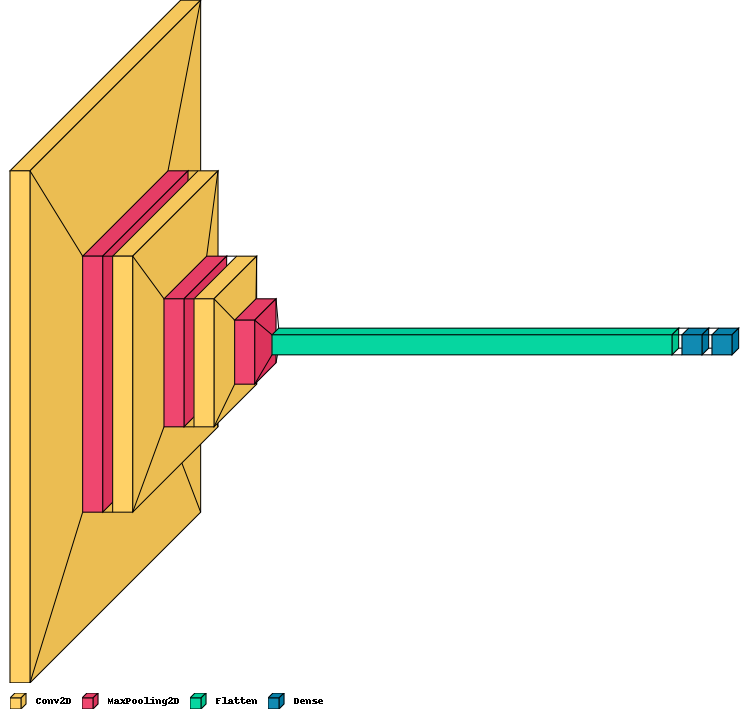

In [1]:
# Creating a Classification model
import tensorflow as tf
!pip install visualkeras
import visualkeras

# Shape of the data
input_shape = (128, 128, 1)

model = tf.keras.models.Sequential()

#Layer 1
model.add(tf.keras.layers.Conv2D(8, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#Layer 2
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#Layer 3
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

## Reduce to 1 dimension for classification
model.add(tf.keras.layers.Flatten())
## Fully connected to combine all features
model.add(tf.keras.layers.Dense(64, activation='relu'))
## Logistic Regression
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

visualkeras.layered_view(model, legend=True)

In [61]:
#Function to create different sized models

def create_base_model(train_data,nLayers=4,nInitConvFilters=8,kernelSize=3):

  # Determine and store the shape of the data
  input_shape = (train_data.shape[1], train_data.shape[2], train_data.shape[3])
  # Create the model
  model = tf.keras.models.Sequential()

  #CNN layers with maxpooling
  for ii in range(nLayers):
    if ii ==0: #First Layer need to define an input size
      model.add(tf.keras.layers.Conv2D(nInitConvFilters*2**ii, kernel_size=(kernelSize, kernelSize), padding='same', activation='relu', input_shape=input_shape))
    else:
      model.add(tf.keras.layers.Conv2D(nInitConvFilters*2**ii, kernel_size=(kernelSize, kernelSize), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(nInitConvFilters*2**ii, kernel_size=(kernelSize, kernelSize), padding='same', activation='relu'))
    ## choose the best features via pooling
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

  ## Reduce to 1 dimension for classification
  model.add(tf.keras.layers.Flatten())
  ## Fully connected to combine all features
  model.add(tf.keras.layers.Dense(nInitConvFilters*2**(ii+1), activation='relu'))
  ## Logistic Regression
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  # Display a model summary
  # model.summary(100)
  return model

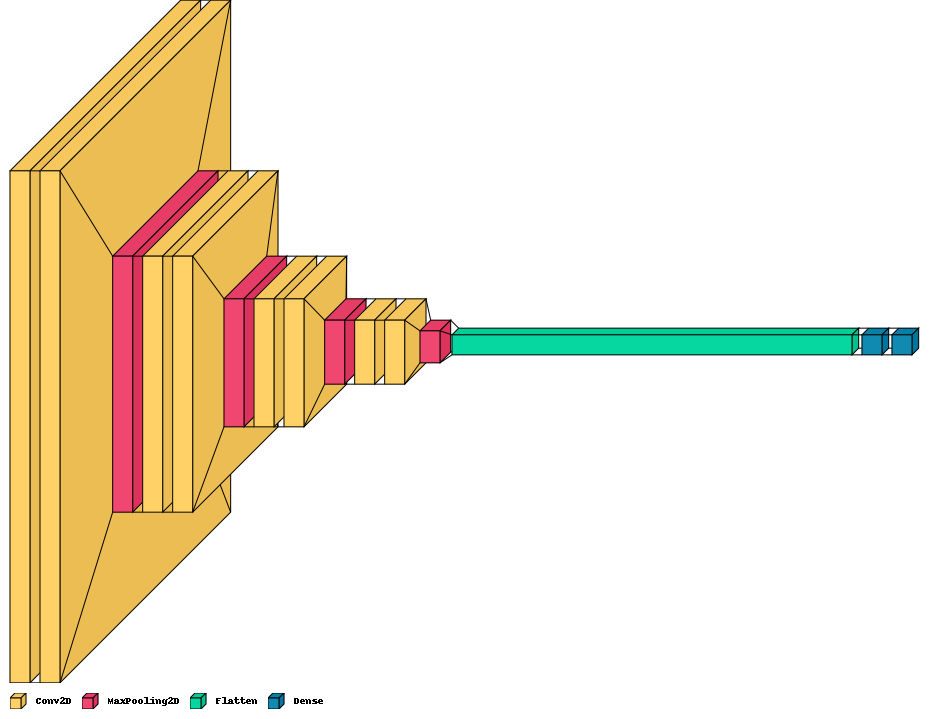

In [62]:
train_data=tf.zeros((1,128,128,1))
model=create_base_model(train_data,nLayers=4,nInitConvFilters=8,kernelSize=3)

# Compile the model
loss_function=tf.keras.losses.binary_crossentropy
learning_rate=0.001
optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Define batches, number of epochs etc,
verbosity = 1
no_epochs=10
batch_size=1

visualkeras.layered_view(model, legend=True)
# Fit model to data
# history = model.fit(train_data, train_labels,
#             validation_data=(val_data,val_labels),
#             batch_size=batch_size,
#             epochs=no_epochs,
#             verbose=verbosity,
#             shuffle=True)


We have now created a model with about half a million parameters. 

Almost ready to go however we do not yet have the most important part ! 

`The data !` 

## Hands-on: Preparing the data and running the model

Data preparation may be one of the most difficult steps in machine learning.

Each dataset is different and highly specific to the project. Preparing it conveniently to learn the task at hand will probably take you more time than designing the model itself. 

Practical steps to go from DICOM files to ML ready data are described in the following section. 

### ACCESSING THE DATA

The full raw MR dataset "Ohio State Cardiac MRI Raw Data" (OCMR) can be obtained from https://registry.opendata.aws/ocmr_data. 

We retrieve the preprocessed OCMR DICOM dataset from the Workshop's github. 

The data is saved in the Downloads/Workshop/DICOMfiles folder.

The list of DICOM files is often provided in an apparently unhelpful format with names such as dicom_3001.dcm, dicom_3002.dcm, dicom_3003.dcm ...  


In [1]:
#Get data from github repository
import os
def get_download_path():
    """Returns the default downloads path for linux or windows"""
    if os.name == 'nt':
        import winreg
        sub_key = r'SOFTWARE\Microsoft\Windows\CurrentVersion\Explorer\Shell Folders'
        downloads_guid = '{374DE290-123F-4565-9164-39C4925E467B}'
        with winreg.OpenKey(winreg.HKEY_CURRENT_USER, sub_key) as key:
            location = winreg.QueryValueEx(key, downloads_guid)[0]
        return location
    else:
        return os.path.join(os.path.expanduser('~'), 'Downloads')

downloadpath=get_download_path() #If for windows does not work please write out the folder you want to download the data to.
images_url = "https://media.githubusercontent.com/media/mrphys/MLinCHD_Workshop/master/Workshop2/data/DICOMfilesWorkshop2.zip"
!wget {images_url} -P {downloadpath}
tmp_path=downloadpath+'/DICOMfilesWorkshop2.zip'
image_path=downloadpath+'/Workshop/'
!unzip {tmp_path} -d {image_path}
image_path=downloadpath+'/Workshop/DICOMfiles/'

/bin/bash: /home/oj20/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
wget: /home/oj20/anaconda3/lib/libuuid.so.1: no version information available (required by wget)
Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/oj20/.wget-hsts'. HSTS will be disabled.
--2022-08-25 16:25:43--  https://media.githubusercontent.com/media/mrphys/MLinCHD_Workshop/master/Workshop2/data/DICOMfilesWorkshop2.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8000::154, 2606:50c0:8003::154, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2777589 (2.6M) [application/zip]
Saving to: ‘/home/oj20/Downloads/DICOMfilesWorkshop2.zip.3’

DICOMfilesWorkshop2 100%[===================>]   2.65M  --.-KB/s    in 0.07s   

2022-08-2

### READING THE DICOM DATA

Read all of the DICOM files (images and headers). At first these are stored into an unstructured list (as images sizes, etc are different/unknown at this stage).

Here the data is already organized into Short Axis images and Non Short Axis images in the folders:
~/Downloads/Workshop/DICOMfiles/ShortAxis
~/Downloads/Workshop/DICOMfiles/nonShortAxis

We install and import necessary packages:

In [ ]:
#Install dicom reader and other libraries
!pip install pydicom tf_clahe
# Now collect ALL of the DICOM data, as well as relevant headers, and store in arrays (unsorted) 
import matplotlib.pylab as plt
import os, os.path
import math
import numpy as np
import tensorflow as tf
import pydicom as dicom
import tf_clahe

We prepare a small preprocessing function for cropping and normalizing the images:

In [83]:
#Small image preprocessing function 
#Crops to square, resize to 128x128 and contrast normalizes.
def image_preprocessing(image,imageSize = 128):
    #Crops to square
    minSz = min(image.shape[0], image.shape[1])
    startX = math.floor((image.shape[0]-minSz)/2)
    startY = math.floor((image.shape[1]-minSz)/2)
    image_resampled = image[startX:startX+minSz, startY:startY+minSz, tf.newaxis]
    #Resized to 128x128
    image_resampled = tf.image.resize(image_resampled, [imageSize,imageSize])
    #Contrast Normalization
    image_preproc=tf_clahe.clahe(image_resampled/np.max(image_resampled)*256)/256
    return image_preproc

And then read all the data and apply preprocessing to all data which we store in a numpy array of size:

(nElements,size x=128, size y=128, nChannels=1) -> for images

We create the corresponding labels (0 for non SAX, 1 for SAX):

(nElements,1) -> for labels

In [90]:
imageSize = 128
#Load Short Axis
ShortAxisfolder=image_path+'/ShortAxis/'
SAXelements=np.zeros((len(os.listdir(ShortAxisfolder)),imageSize,imageSize,1))
for ii,file in enumerate(np.sort(os.listdir(ShortAxisfolder))):
    file_path = ShortAxisfolder+file
    # read file
    ds = dicom.dcmread(file_path)

    image = ds.pixel_array
    image_preproc=image_preprocessing(image)
    
    SAXelements[ii,:,:,:]=image_preproc

#Load Non Short Axis
nonShortAxisfolder=image_path+'/nonShortAxis/'
nonSAXelements=np.zeros((len(os.listdir(nonShortAxisfolder)),imageSize,imageSize,1))
for ii,file in enumerate(np.sort(os.listdir(nonShortAxisfolder))):
    file_path = nonShortAxisfolder+file
    # read file
    ds = dicom.dcmread(file_path)

    image = ds.pixel_array
    image_preproc=image_preprocessing(image)
    
    nonSAXelements[ii,:,:,:]=image_preproc

#Create labels
SAXLabels=np.ones((SAXelements.shape[0],1))
nonSAXLabels=np.zeros((nonSAXelements.shape[0],1))

### Assemble the data and split the machine learning sets

The assembling function is ran and the data is separated into :

    Training set : 60 %
    Validation set: 20 %
    Test set: rest



In [94]:
# Split the dataset into training, validation and test set
train_perc=60/100 
val_perc=20/100
nTrain_SAX=int(train_perc*SAXelements.shape[0]);nTrain_nonSAX=int(train_perc*nonSAXelements.shape[0])
nVal_SAX=int((train_perc+val_perc)*SAXelements.shape[0]);nVal_nonSAX=int((train_perc+val_perc)*nonSAXelements.shape[0]);

train_data=np.concatenate((SAXelements[:nTrain_SAX,:,:,:],nonSAXelements[:nTrain_nonSAX,:,:,:]),axis=0)
train_labels=np.concatenate((SAXLabels[:nTrain_SAX,:],nonSAXLabels[:nTrain_nonSAX,:]),axis=0)

val_data=np.concatenate((SAXelements[nTrain_SAX:nVal_SAX,:,:,:],nonSAXelements[nTrain_nonSAX:nVal_nonSAX,:,:,:]),axis=0)
val_labels=np.concatenate((SAXLabels[nTrain_SAX:nVal_SAX,:],nonSAXLabels[nTrain_nonSAX:nVal_nonSAX,:]),axis=0)

test_data=np.concatenate((SAXelements[nVal_SAX:,:,:,:],nonSAXelements[nVal_nonSAX:,:,:,:]),axis=0)
test_labels=np.concatenate((SAXLabels[nVal_SAX:,:],nonSAXLabels[nVal_nonSAX:,:]),axis=0)

print('Total: SAX',SAXelements.shape[0],'nonSAX',nonSAXelements.shape[0],
      '\nTrain: SAX',nTrain_SAX,'nonSAX',nTrain_nonSAX,
      '\nValidation: SAX',nVal_SAX-nTrain_SAX,'nonSAX',nVal_nonSAX-nTrain_nonSAX,
       '\nTest: SAX',SAXelements.shape[0]-nVal_SAX,'nonSAX',nonSAXelements.shape[0]-nVal_nonSAX,
       '\n\nFormatted Image Sets Shapes (Train/val/test):\n', train_data.shape,'/', val_data.shape,'/', test_data.shape,
       '\nFormatted Label Sets Shapes (Train/val/test):\n', train_labels.shape,'/', val_labels.shape,'/', test_labels.shape)


Total: SAX 32 nonSAX 42 
Train: SAX 19 nonSAX 25 
Validation: SAX 6 nonSAX 8 
Test: SAX 7 nonSAX 9 

Formatted Image Sets Shapes (Train/val/test):
 (44, 128, 128, 1) / (14, 128, 128, 1) / (16, 128, 128, 1) 
Formatted Label Sets Shapes (Train/val/test):
 (44, 1) / (14, 1) / (16, 1)


### Don't Forget to look at the images !

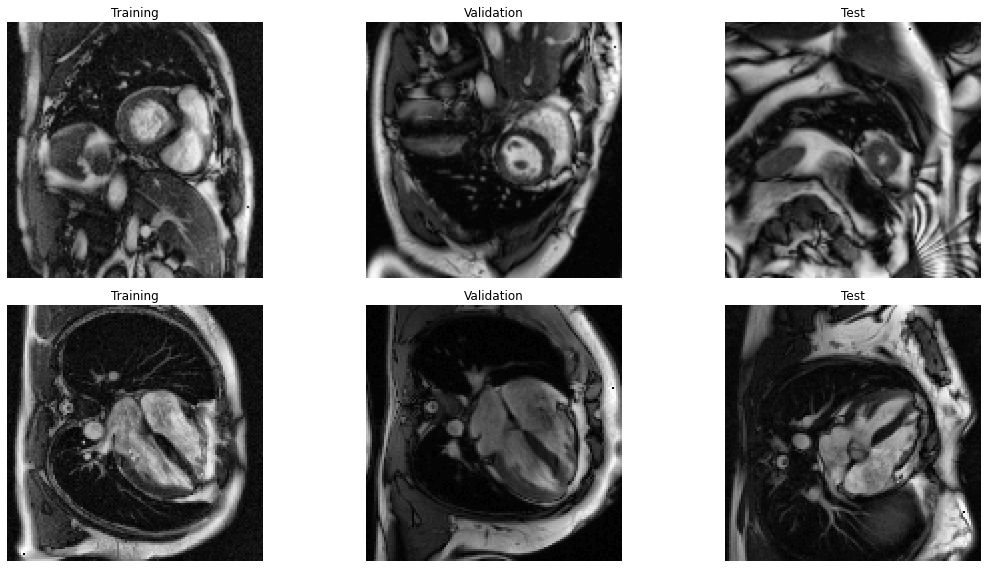

In [95]:
#Plot one image from each set
fig=plt.figure(figsize=(16,8))
plt.subplot(231)
plt.imshow(train_data[0,:,:,0],cmap='gray')
plt.axis('off')
plt.title('Training')
plt.subplot(232)
plt.imshow(val_data[0,:,:,0],cmap='gray')
plt.axis('off')
plt.title('Validation')
plt.subplot(233)
plt.imshow(test_data[0,:,:,0],cmap='gray')
plt.axis('off')
plt.title('Test')
plt.subplot(234)
plt.imshow(train_data[-1,:,:,0],cmap='gray')
plt.axis('off')
plt.title('Training')
plt.subplot(235)
plt.imshow(val_data[-1,:,:,0],cmap='gray')
plt.axis('off')
plt.title('Validation')
plt.subplot(236)
plt.imshow(test_data[-1,:,:,0],cmap='gray')
plt.axis('off')
plt.title('Test')
fig.tight_layout()

### Ready for the task at hand

In this section, we return to the model creation and this time we actually perform the fitting with the preprocessed data.

In [96]:
tf.random.set_seed(1)
np.random.seed(1)
model=create_base_model(train_data)


# Compile the model
loss_function=tf.keras.losses.binary_crossentropy
learning_rate=0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
# Define batches, number of epochs etc,
verbosity = 1
no_epochs=10
batch_size=1
# Fit model to data
history = model.fit(train_data, train_labels,
            validation_data=(val_data,val_labels),
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            shuffle=True)

Epoch 1/10


2022-08-25 11:54:30.228322: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2022-08-25 11:54:31.287984: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


44/44 [==============================] - 3s 6ms/step - loss: 0.6939 - accuracy: 0.5682 - val_loss: 0.6920 - val_accuracy: 0.5714
Epoch 2/10
44/44 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5682 - val_loss: 0.6890 - val_accuracy: 0.5714
Epoch 3/10
44/44 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5682 - val_loss: 0.6826 - val_accuracy: 0.5714
Epoch 4/10
44/44 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.7273 - val_loss: 0.6746 - val_accuracy: 0.5714
Epoch 5/10
44/44 [==============================] - 0s 3ms/step - loss: 0.5743 - accuracy: 0.7273 - val_loss: 0.5915 - val_accuracy: 0.6429
Epoch 6/10
44/44 [==============================] - 0s 3ms/step - loss: 0.3533 - accuracy: 0.8864 - val_loss: 0.4267 - val_accuracy: 0.7857
Epoch 7/10
44/44 [==============================] - 0s 3ms/step - loss: 0.1552 - accuracy: 0.9318 - val_loss: 0.6119 - val_accuracy: 0.6429
Epoch 8/10
44/44 [=============

### Evaluating the model

The model is classically evaluated on a separate test set once after metrics on the training and validation set are convincing.

Here we look at the training and validation loss.

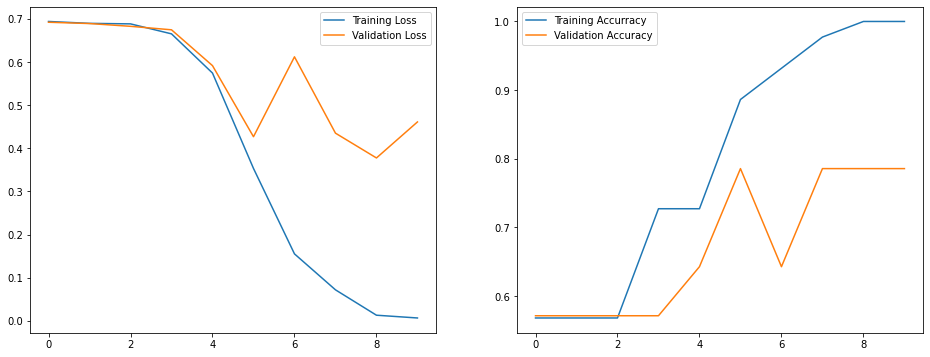

In [97]:
fig = plt.figure(figsize=(16,6))
plt.subplot(121)  # Plot the training curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
leg = plt.legend()
plt.subplot(122)
# Plot the training curves
plt.plot(history.history['accuracy'], label='Training Accurracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
leg = plt.legend()


1/1 [==============================] - 0s 175ms/step - loss: 0.1981 - accuracy: 0.8750


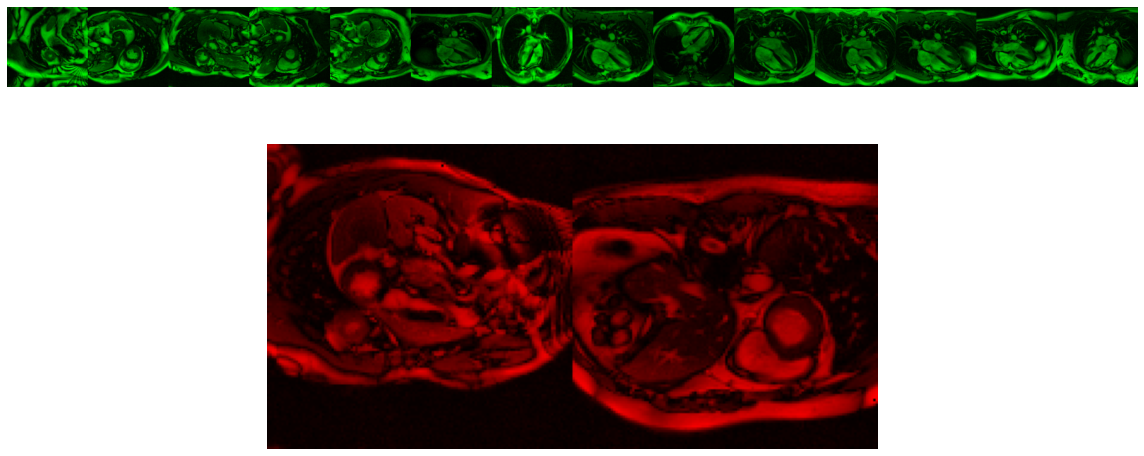

In [98]:
#Plot Test set (green correct, red incorrect)
## Evaluate the model on the test set
testeval = model.evaluate(test_data,test_labels)
results = model.predict(test_data)

#Visualize results
fig=plt.figure(figsize=(16,8))
plt.subplot(211)
indexes=np.squeeze((test_labels>0.5)==(results>0.5))
PositiveImages=np.reshape(test_data[indexes,:,:,0],(-1,128))
PositiveImages=np.stack((np.zeros(PositiveImages.shape),PositiveImages,np.zeros(PositiveImages.shape)),axis=-1)
plt.imshow(np.transpose(PositiveImages,axes=(1,0,2)))
plt.axis('off')
plt.subplot(212)
indexes=np.squeeze((test_labels>0.5)!=(results>0.5))
NegativeImages=np.reshape(test_data[indexes,:,:],(-1,128))
NegativeImages=np.stack((NegativeImages,np.zeros(NegativeImages.shape),np.zeros(NegativeImages.shape)),axis=-1)
plt.imshow(np.transpose(NegativeImages,axes=(1,0,2)))
plt.axis('off')
fig.tight_layout()

# Conclusion

In this tutorial, we learned a few basic steps for image classification. 

1. We performed a logistic regression using Tensorflow, 
2. We created a simple CNN model for feature extraction and image classification 
3. We prepared a small machine learning dataset from a set of DICOM files obtained from the OCMR dataset.
4. Finally we fitted and evaluated the model.

In the next session we will look into avoiding pitfalls, improving performance and reducing overfitting of the model using a few classical ML methods.

## In the next lesson: Avoiding Pitfalls/ Improving performance / Reducing overfitting ! 